In [1]:
! pip install psycopg2-binary pandas matplotlib seaborn

     |████████████████████████████████| 9.2 MB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 294 kB 7.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 7.4 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 10.0 MB/s eta 0:00:01     |██████████████████████████▏     | 3.9 MB 10.0 MB/s eta 0:00:01
     |████████████████████████████████| 104 kB 12.1 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 12.2 MB/s eta 0:00:01
     |████████████████████████████████| 4.4 MB 6.1 MB/s eta 0:00:01


In [2]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
conn_params = {
    'dbname': 'postgres',
    'user': 'postgres',
    'password': 'postgres',
    'host': 'localhost',
    'port': 5432
}

In [11]:
conn = psycopg2.connect(**conn_params)
df = pd.read_sql("""
SELECT 
    * 
FROM 
    public_elementary.dbt_run_results;                  
""", conn)
conn.close()

/tmp/ipykernel_32073/1317498059.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("""


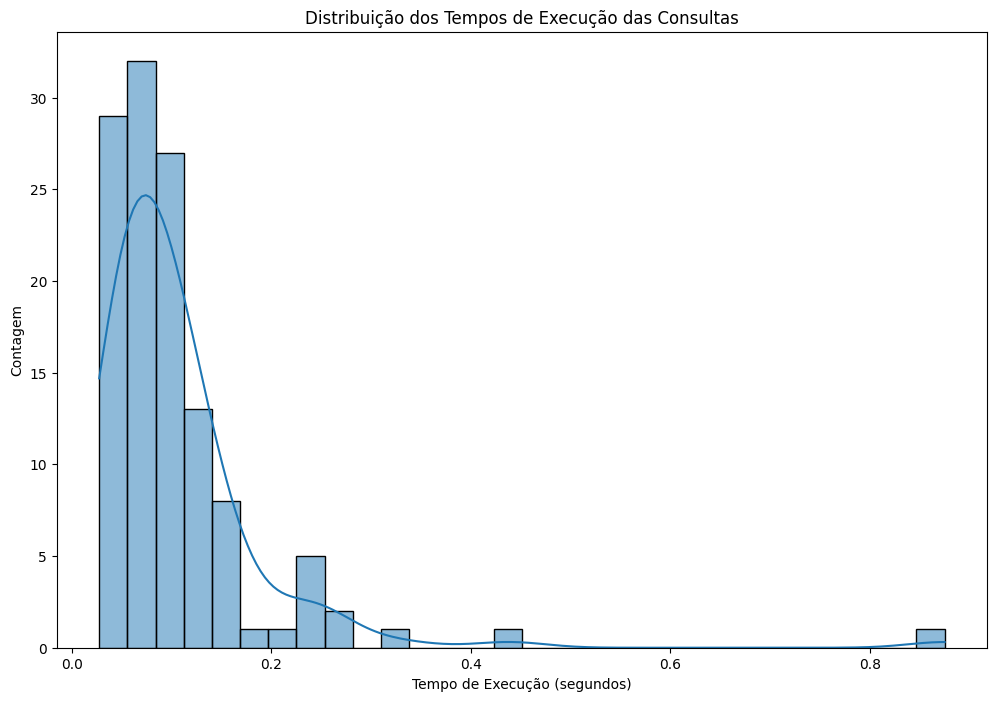

In [13]:
if not df.empty:
    df['execution_time'] = pd.to_numeric(df['execution_time'], errors='coerce')

    df = df.dropna(subset=['execution_time'])

    # Cria o gráfico
    plt.figure(figsize=(12, 8))
    sns.histplot(data=df, x='execution_time', bins=30, kde=True)
    plt.title('Distribuição dos Tempos de Execução das Consultas')
    plt.xlabel('Tempo de Execução (segundos)')
    plt.ylabel('Contagem')
    plt.show()
else:
    print("A tabela está vazia ou não contém dados relevantes.")